## Diabetes Prediction using Machine Learning with Python

#### Prediction using SVM

###### Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

###### تم وضع العديد من القيود على اختيار هذه الحالات من قاعدة بيانات أكبر. على وجه الخصوص ، جميع المرضى هنا من الإناث تبلغ من العمر 21 عامًا على الأقل من تراث بيما الهندي.

### -----------------------------------------------------------------------------

###### Pregnancies: Number of times pregnant
###### الحمل : عدد مرات الحمل 

###### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
###### الجلوكوز: تركيز الجلوكوز في البلازما لمدة ساعتين في اختبار تحمل الجلوكوز الفموي

###### --------------------------
###### BloodPressure: Diastolic blood pressure (mm Hg)
###### ضغط الدم: ضغط الدم الانبساطي (مم زئبق)

###### --------------------------
###### SkinThickness: Triceps skin fold thickness (mm)
###### سماكة الجلد: سمك طية الجلد ثلاثية الرؤوس (مم (

###### --------------------------
###### Insulin: 2-Hour serum insulin (mu U/ml)
###### الأنسولين: الأنسولين في الدم لمدة ساعتين (mu U / ml)

###### --------------------------
###### BMI: Body mass index (weight in kg/(height in m)^2)
###### مؤشر كتلة الجسم: مؤشر كتلة الجسم (الوزن بالكيلو جرام / (الطول بالمتر) ^ 2)

###### --------------------------
###### DiabetesPedigreeFunction: Diabetes pedigree function
###### وظيفة السكري: وظيفة مرض السكري

###### --------------------------
###### Age: Age (years)

###### --------------------------
###### Outcome: Class variable (0 or 1)



##### ------------------------------------------------
##### 0 --> Non-Diabetic
##### 1 --> Diabetic

In [198]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import train_test_split

In [199]:
# load data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [200]:
# fill zero ..
for i in data.columns:
    if i != 'Pregnancies' or i != 'Outcome':
        data[i] = data[i].replace(0 , data[i].median())

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [201]:
data['Pregnancies'].unique()

array([ 6,  1,  8,  3,  5, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [202]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [203]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [205]:
data.isna().sum().sort_values(ascending = False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

In [206]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


[]

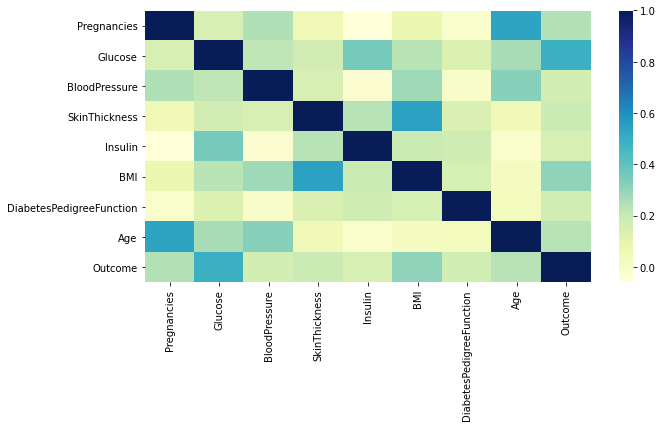

In [207]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr() , cmap='YlGnBu')
plt.plot()

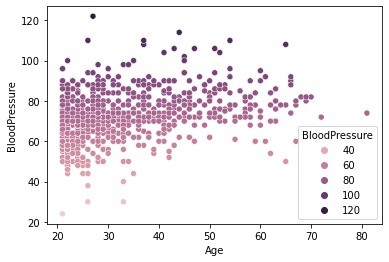

In [208]:
# plot graph between BloodPressure and Age
sns.scatterplot(x='Age' , y = 'BloodPressure' , data=data , c=data.index , hue='BloodPressure')
plt.show()

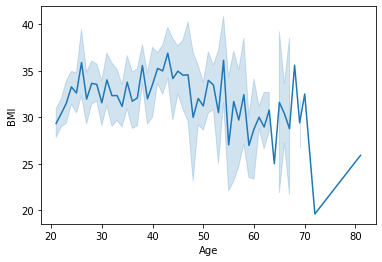

In [209]:
# Plot relation between Age and BMI
sns.lineplot(x='Age' , y='BMI' , data=data)
plt.show()

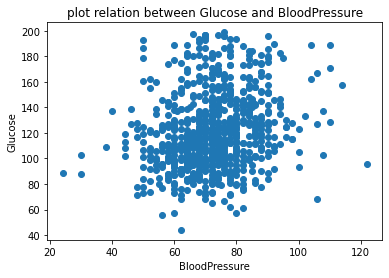

In [210]:
# The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)

# plot relation between Glucose and BloodPressure
plt.scatter(data['BloodPressure'] , data['Glucose'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('plot relation between Glucose and BloodPressure')
plt.show()

In [211]:
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=42 , stratify = y )

In [212]:
# use SVC to predict Outcome
model = SVC(kernel='linear' , random_state=42)
model.fit(X_train , y_train)

# Predict X_train after model fit it
training_prediction = model.predict(X_train)
traing_df = pd.DataFrame(data={'Prediction Value ':training_prediction , 'Actual Value ':y_train})
# traing_df.head(20)
print("Score for predicted traing data : " , model.score(X_train , y_train))

Score for predicted traing data :  0.7914338919925512


In [217]:
testing_prediction = model.predict(X_test)
testing_df = pd.DataFrame(data={'Prediction Value ':testing_prediction , 'Actual Value ':y_test})
testing_df.head(20)
print("Score for predicted testing data : " , model.score(X_test , y_test))

Score for predicted testing data :  0.7316017316017316


In [218]:
print("********************************************")
print("Accuracy Score for predicted data : " , accuracy_score(y_test , testing_prediction))
print("********************************************")
print("Confusion Matrix : \n " , confusion_matrix(y_test , testing_prediction))
print("********************************************")
print("Classification Report : \n" , classification_report(y_test , testing_prediction))

********************************************
Accuracy Score for predicted data :  0.7316017316017316
********************************************
Confusion Matrix : 
  [[129  21]
 [ 41  40]]
********************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



D:\Anaconda3_setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


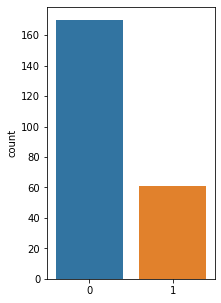

In [219]:
plt.figure(figsize=(3,5))
sns.countplot(testing_prediction)
plt.show()

# Making a Predictive System

In [221]:
input_data = (6,166,72,19,175,25.8,0.587,51)

# convert input_data to array
input_data_as_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic : 0' )
else:
  print('The person is diabetic : 1'  )

[1]
The person is diabetic : 1
